#Detección de enfermedades foliares en árboles de manzana utilizando técnicas de Deep Learning

# ¿Qué?

Se busca automatizar el proceso de detección y clasificación de enfermedades foliares en árboles de manzana haciendo uso de técnicas de visión por computador, con el fin de obtener diágnosticos oportunos y con mayor precisión.

# ¿Cómo?

Proveer un modelo de red neuronal convolucional que permita clasificar las enfermedades foliares con una precisión superior a 90%

# ¿Para qué?

Brindar diágnosticos acertados y con menor costo sobre el estado de las hojas de manzano,  y generar un impacto ambiental positivo al reducir el uso excesivo de técnicas de fumigación con productos químicos.

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import seaborn as sns
import os
from fastai.vision import *
import shutil
import glob
import cv2

#Importar Keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

Instalar librería keras_efficientnets.

In [ ]:
!pip install keras_efficientnets

#PATHS

In [ ]:
path_train = "/content/drive/My Drive/hojas/train.csv"
path_test = "/content/drive/My Drive/hojas/test.csv"
path_submission = "/content/drive/My Drive/hojas/sample_submission.csv"
path_images = "/content/drive/My Drive/hojas/images"
path_images_train = "/content/drive/My Drive/hojas/train"
path_images_test = "/content/drive/My Drive/hojas/test"

#Ejemplo de una imagen

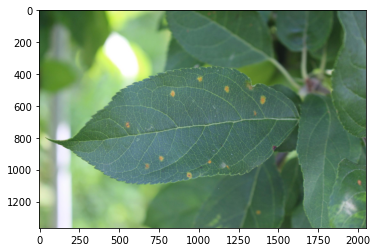

In [ ]:
random_image = cv2.imread('/content/drive/My Drive/hojas/train/Train_928.jpg',1)
random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
plt.imshow(random_image)

#Lectura de datos .csv

In [ ]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


##Valoración del dataset.
#¿Cuántas imágenes hay según cada clase?

#Healthy leaves

In [ ]:
healthy= train[train['healthy']==1]
healthy_leaves = list(healthy['image_id'])
print("El número de hojas sanas es: ", len(healthy_leaves))

El número de hojas sanas es:  516


In [ ]:
healthy.head()

,image_id,healthy,multiple_diseases,rust,scab
2,Train_2,1,0,0,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
9,Train_9,1,0,0,0
13,Train_13,1,0,0,0


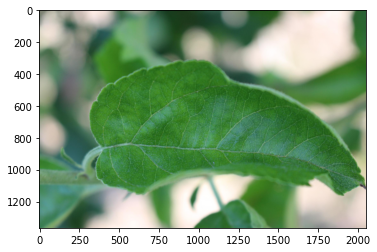

In [ ]:
healthy_image = cv2.imread(path_images_train + "/" + healthy_leaves[0] + ".jpg",1)
healthy_image = cv2.cvtColor(healthy_image, cv2.COLOR_BGR2RGB)
plt.imshow(healthy_image)

#Multiple diseases leaves

In [ ]:
multiple_diseases= train[train['multiple_diseases']==1]
multiple_diseases_leaves = list(multiple_diseases['image_id'])
print("El número de hojas con múltiples enfermedades es: ", len(multiple_diseases_leaves))

El número de hojas con múltiples enfermedades es:  91


In [ ]:
multiple_diseases.head()

,image_id,healthy,multiple_diseases,rust,scab
1,Train_1,0,1,0,0
6,Train_6,0,1,0,0
25,Train_25,0,1,0,0
36,Train_36,0,1,0,0
62,Train_62,0,1,0,0


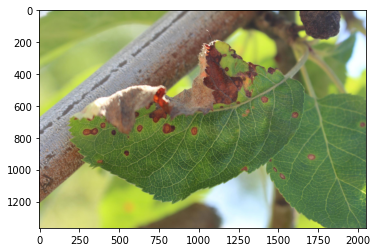

In [ ]:
md_image = cv2.imread(path_images_train + "/" + multiple_diseases_leaves[0] + ".jpg",1)
md_image = cv2.cvtColor(md_image, cv2.COLOR_BGR2RGB)
plt.imshow(md_image)

#Rust leaves

In [ ]:
rust = train[train['rust']==1]
rust_leaves = list(rust['image_id'])
print("El número de hojas con óxido (o moho) son: ",len(rust_leaves))

El número de hojas con óxido (o moho) son:  622


In [ ]:
rust.head()

,image_id,healthy,multiple_diseases,rust,scab
3,Train_3,0,0,1,0
10,Train_10,0,0,1,0
14,Train_14,0,0,1,0
15,Train_15,0,0,1,0
21,Train_21,0,0,1,0


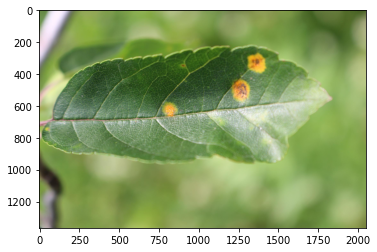

In [ ]:
rust_image = cv2.imread(path_images_train + "/" + rust_leaves[0] + ".jpg",1)
rust_image = cv2.cvtColor(rust_image, cv2.COLOR_BGR2RGB)
plt.imshow(rust_image)

#Scab leaves

In [ ]:
scab= train[train['scab']==1]
scab_leaves = list(scab['image_id'])
print("El número de hojas con costras son: ", len(scab_leaves))

El número de hojas con costras son:  592


In [ ]:
scab.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
11,Train_11,0,0,0,1
12,Train_12,0,0,0,1


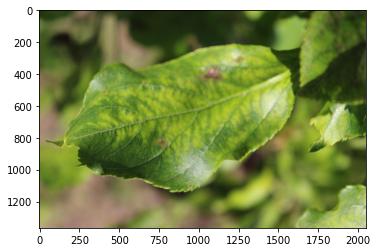

In [ ]:
scab_image = cv2.imread(path_images_train + "/" + scab_leaves[0] + ".jpg",1)
scab_image = cv2.cvtColor(scab_image, cv2.COLOR_BGR2RGB)
plt.imshow(scab_image)

#Distribución de los datos (gráficamente)

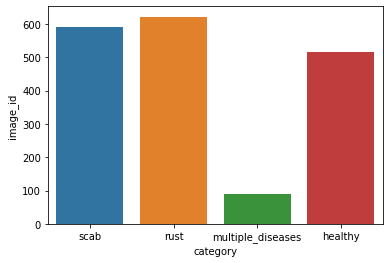

In [ ]:
data_distribuida = train.groupby(['healthy', 'multiple_diseases', 'rust', 'scab'])['image_id'].count().reset_index()
data_distribuida['category'] = ['scab','rust','multiple_diseases','healthy']

sns.barplot(x='category', y='image_id', data=data_distribuida)

#Pre-procesamiento de datos, organización de conjuntos de training-validación:

Conectarse a la TPU de Collab (Acelera el procesamiento)

In [ ]:
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.104.40.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.104.40.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Modificar el image_id de ambos dataframe (test y train) para poder utilizar el datagen de keras correctamente, añadiendo .jpg al final.

In [ ]:
train_modificado = train
train_modificado['image_id'] = train_modificado['image_id'] + ".jpg"

#train_modificado

In [ ]:
test_modificado = test
test_modificado['image_id'] = test_modificado['image_id'] + ".jpg"

#test_modificado

Realizar un split 80-20 de los datos y realizar data augmentation con ImageDataGenerator. Se utiliza un random_state para guardar la semilla de aleatoreidad de los conjuntos de train_df y val_df.

In [ ]:
train_labels = np.float32(train.loc[:, 'healthy':'scab'].values)

train_df, val_df = train_test_split(train_modificado, test_size = 0.20, random_state = 10)

#Data Augmentation con Keras, utilizando .flow_from_dataframe

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])

In [ ]:
train_generator=train_datagen.flow_from_dataframe(train_df,directory=path_images_train,
                                                      target_size=(256,256),
                                                      x_col="image_id",
                                                      y_col=['healthy','multiple_diseases','rust','scab'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                       subset='training',
                                                      batch_size=32)

Found 1456 validated image filenames.


In [ ]:
val_generator=train_datagen.flow_from_dataframe(val_df,directory=path_images_train,
                                                      target_size=(256,256),
                                                      x_col="image_id",
                                                      y_col=['healthy','multiple_diseases','rust','scab'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                      batch_size=32
                                                  )

Found 365 validated image filenames.


In [ ]:
test_generator=train_datagen.flow_from_dataframe(test,directory=path_images_test,
                                                      target_size=(256,256),
                                                      x_col="image_id",
                                                      y_col=None,
                                                      class_mode=None,
                                                      shuffle=False,
                                                      batch_size=32)

Found 1821 validated image filenames.


#Modelo EfficientNet-B4 (Pre-entrenado)
Información (paper): https://arxiv.org/abs/1905.11946

Importar librerías para la CNN

In [ ]:
from keras_efficientnets import EfficientNetB4
from keras.models import Model
import keras
from keras import optimizers
from keras.regularizers import l1

In [ ]:
#modelo EfficientNET-B4
model_finetuned = EfficientNetB4(input_shape= (256,256,3), classes=1000, include_top= False, weights='imagenet')
x = model_finetuned.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu",activity_regularizer=l1(0.001))(x)
x = (Dropout(0.4))(x)
x = Dense(64, activation="relu")(x)
x = (Dropout(0.4))(x)
x = Dense(32, activation="relu")(x)
x = (Dropout(0.4))(x)
predictions = Dense(4, activation="softmax")(x)
model_finetuned = Model(inputs=model_finetuned.input, outputs=predictions)
model_finetuned.compile(optimizer='adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])
model_finetuned.summary()


71720960/71719528 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 128, 128, 48) 0           batch_normalization_1[0][0]      
___________________________

# Training the neural net

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  history = model_finetuned.fit_generator(train_generator,                                    
                                  steps_per_epoch=100, 
                                  epochs=15,validation_data=val_generator,validation_steps=100
                                  ,verbose=1,callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)])

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/15
100/100 [==============================] - 871s 9s/step - loss: 1.0535 - accuracy: 0.7099 - val_loss: 0.9374 - val_accuracy: 0.8274
Epoch 2/15
100/100 [==============================] - 541s 5s/step - loss: 0.7140 - accuracy: 0.8501 - val_loss: 0.5624 - val_accuracy: 0.7188
Epoch 3/15
100/100 [==============================] - 541s 5s/step - loss: 0.6905 - accuracy: 0.8376 - val_loss: 0.3585 - val_accuracy: 0.8864
Epoch 4/15
100/100 [==============================] - 539s 5s/step - loss: 0.5160 - accuracy: 0.8993 - val_loss: 0.3905 - val_accuracy: 0.8658
Epoch 5/15
100/100 [==============================] - 541s 5s/step - loss: 0.4580 - accuracy: 0.9044 - val_loss: 0.2720 - val_accuracy: 0.9049
Epoch 6/15
100/100 [==============================] - 550s 5s/step - loss: 0.4395 - accuracy: 0.9028 - val_loss: 0.1479 - val_accuracy: 0.8554
Epoch 7/15
100/100 [==============================] - 536s 5s/step - loss: 0.3781 - accuracy: 0.9227 - val_loss: 0.2073 - val_accuracy: 0.9177

In [ ]:
model_finetuned.save('/content/drive/My Drive/hojas/trained_models/EfficientNETB4_hojas_rgb_TPU_definitivo.h5')

#Curva de precisión 

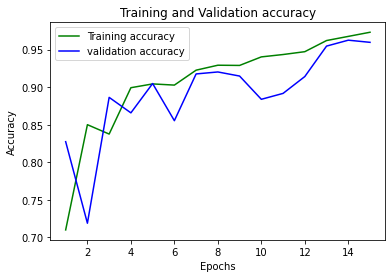

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Curva de la función de pérdida

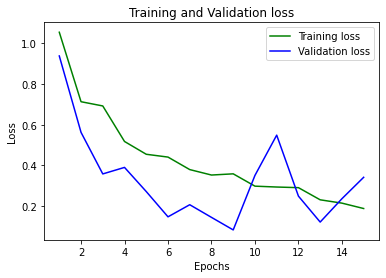

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Prueba de Predicción

In [ ]:
from keras.models import load_model

In [ ]:
sub = pd.read_csv(path_submission)

model= load_model('/content/drive/My Drive/hojas/trained_models/EfficientNETB4_hojas_rgb_TPU_definitivo.h5')
probs = model.predict(test_generator, verbose = 1)
sub.loc[:,'healthy':] = probs
sub.to_csv('/content/drive/My Drive/hojas/submission_predictions_efficientnetb4.csv', index =  False)
sub.head()

57/57 [==============================] - 101s 2s/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000469,0.010187,0.989127,0.000217
1,Test_1,0.000010,0.001424,0.998560,0.000006
2,Test_2,0.000054,0.001076,0.000003,0.998867
3,Test_3,0.970842,0.004652,0.013234,0.011271
4,Test_4,0.000004,0.000867,0.999126,0.000003
